# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   (https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection)
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

from sklearn.preprocessing import StandardScaler, LabelEncoder  
from sklearn.decomposition import PCA  
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score  
from yellowbrick.cluster import KElbowVisualizer  

from sklearn.ensemble import RandomForestClassifier  
from sklearn.feature_selection import SelectFromModel  


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [477]:
file_path = "bank_transactions_data_2.csv" 
data = pd.read_csv(file_path)  

# Menampilkan informasi dasar dataset
print(data.info())  

# Menampilkan 5 baris pertama dari dataset
print(data.head())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [478]:
# 1. Memahami Struktur Data  
print("Dataset Info:")  
print(data.info())  

# Menampilkan statistik deskriptif untuk kolom numerik  
print("\nDescriptive statistics:")  
print(data.describe(include='all'))  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBal

       TransactionID AccountID  TransactionAmount      TransactionDate  \
count           2512      2512        2512.000000                 2512   
unique          2512       495                NaN                 2512   
top         TX002496   AC00460                NaN  2023-04-03 16:07:53   
freq               1        12                NaN                    1   
mean             NaN       NaN         297.593778                  NaN   
std              NaN       NaN         291.946243                  NaN   
min              NaN       NaN           0.260000                  NaN   
25%              NaN       NaN          81.885000                  NaN   
50%              NaN       NaN         211.140000                  NaN   
75%              NaN       NaN         414.527500                  NaN   
max              NaN       NaN        1919.110000                  NaN   

       TransactionType    Location DeviceID      IP Address MerchantID  \
count             2512        2512   

In [479]:
# 2. Menangani Data yang Hilang  
missing_values = data.isnull().sum()  
print("\nMissing Values:")  
print(missing_values[missing_values > 0])  



Missing Values:
Series([], dtype: int64)


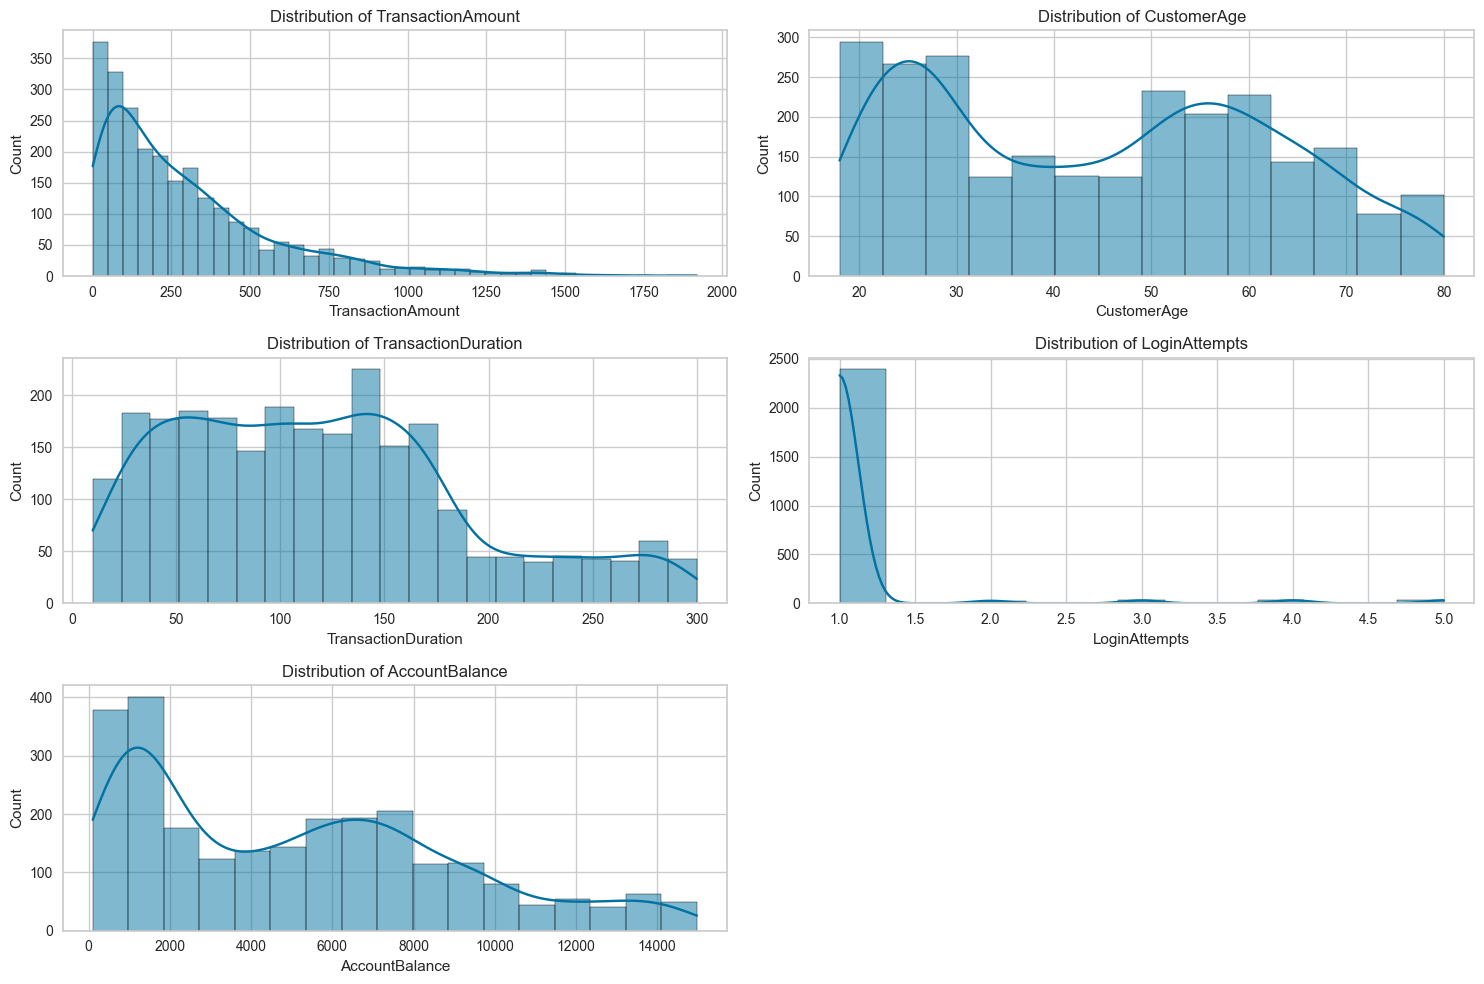

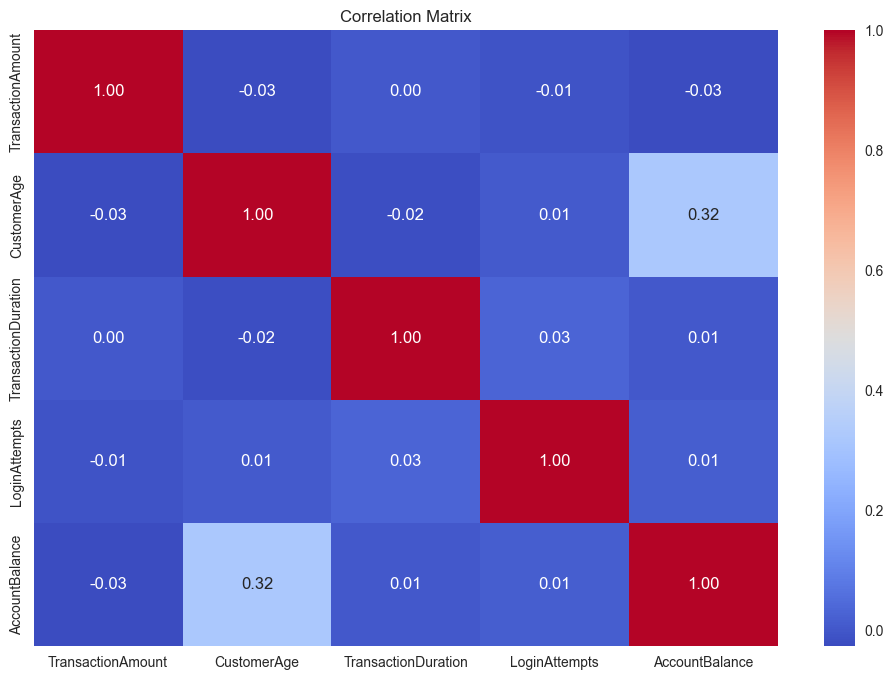

In [ ]:
# 3. Analisis Distribusi dan Korelasi  
# Histogram untuk variabel numerik  
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()  

plt.figure(figsize=(15, 10))  
for i, column in enumerate(numerical_features, 1):  
    plt.subplot(3, 2, i)  
    sns.histplot(data[column], kde=True)  
    plt.title(f'Distribution of {column}')  
plt.tight_layout()  
plt.show()  

# Korelasi antar variabel  
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()  
plt.figure(figsize=(12, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')  
plt.title('Correlation Matrix')  
plt.show()  


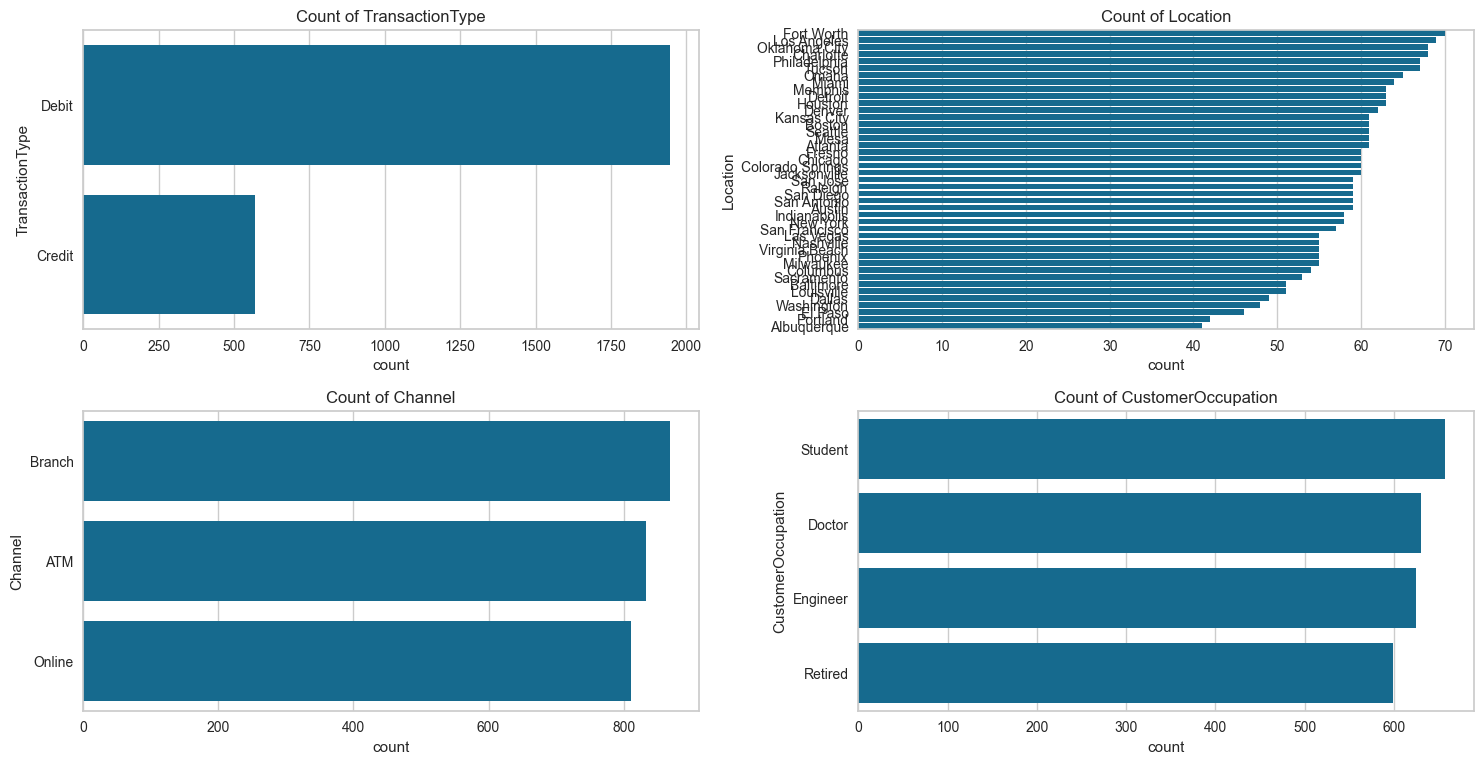

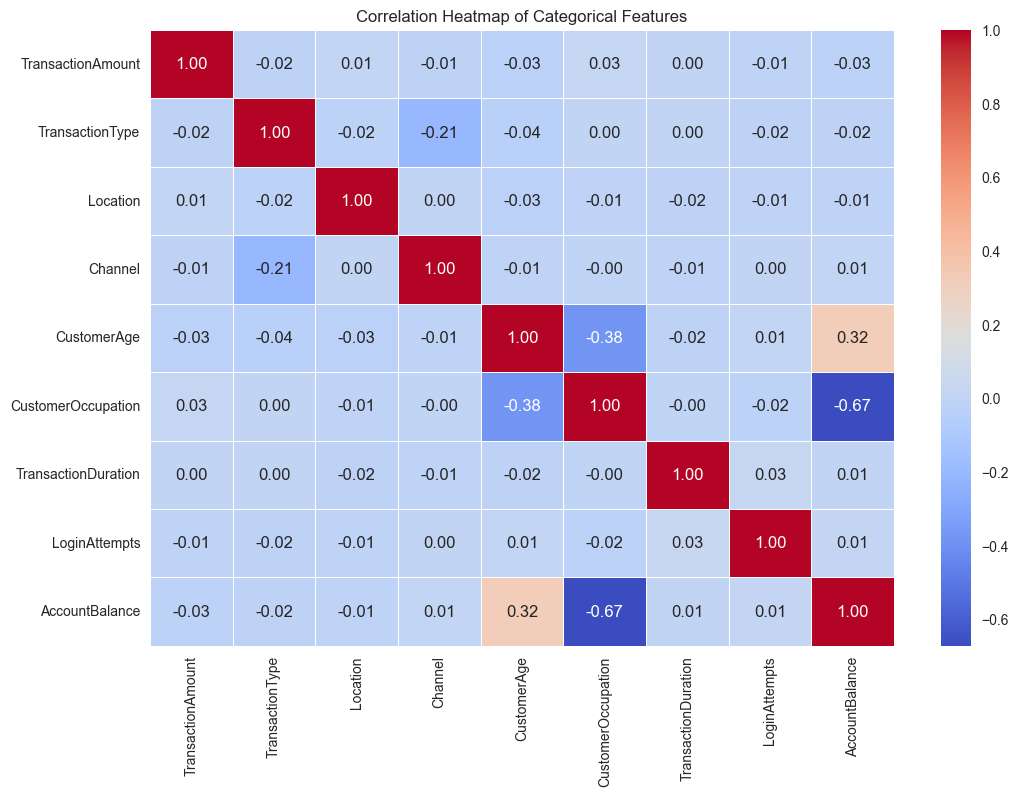

In [481]:
# Memilih kolom kategorikal yang relevan  
relevant_categorical_features = [  
    'TransactionType', 'Location', 'Channel', 'CustomerOccupation' 
]  

# Visualisasi dengan Countplot untuk setiap kolom relevan  
plt.figure(figsize=(15, 15))  
for i, column in enumerate(relevant_categorical_features, 1):  
    plt.subplot(4, 2, i)  
    sns.countplot(y=data[column], order=data[column].value_counts().index)  
    plt.title(f'Count of {column}')  
plt.tight_layout()  
plt.show()  

# Mengencode kolom kategorikal menjadi numerik untuk analisis korelasi  
data_encoded = data.copy()  
for column in relevant_categorical_features:  
    data_encoded[column] = data_encoded[column].astype('category').cat.codes  

# Memeriksa kolom numerik untuk heatmap  
num_columns = data_encoded.select_dtypes(include=[np.number]).columns.tolist()  

# Pembuatan matriks korelasi dan penggambaran heatmap  
corr_matrix = data_encoded[num_columns].corr()  
plt.figure(figsize=(12, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)  
plt.title('Correlation Heatmap of Categorical Features')  
plt.show()  

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [482]:
# Memuat dataset dari file yang diberikan  
df = pd.read_csv('bank_transactions_data_2.csv')  

# 1. Mengonversi kolom tanggal ke format datetime  
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])  
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])  

# 2. Mengonversi AccountBalance menjadi float  
df['AccountBalance'] = df['AccountBalance'].astype(float) 
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

In [483]:
# Mengambil catatan sebelum menghapus duplikat  
initial_count = df.shape[0]  

# Menghapus data duplikat berdasarkan kolom 'TransactionID'  
df.drop_duplicates(subset='TransactionID', keep='first', inplace=True)  

# Mengambil jumlah catatan setelah menghapus duplikat  
final_count = df.shape[0]  

# Menampilkan informasi tentang penghapusan duplikat  
print(f'Jumlah catatan sebelum penghapusan duplikat: {initial_count}')  
print(f'Jumlah catatan setelah penghapusan duplikat: {final_count}')  
print(f'Jumlah duplikat yang dihapus: {initial_count - final_count}')  
print(df.info())  

Jumlah catatan sebelum penghapusan duplikat: 2512
Jumlah catatan setelah penghapusan duplikat: 2512
Jumlah duplikat yang dihapus: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge             

In [484]:
# 1. Binning pada CustomerAge  
age_bins = [0, 18, 30, 40, 50, 60, 70, 80]  # Rentang usia  
age_labels = ['Under 18', '18-29', '30-39', '40-49', '50-59', '60-69', '70-80']  
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=age_bins, labels=age_labels, right=False)  

# 2. Binning pada TransactionAmount  
amount_bins = [0, 100, 300, 600, 1000, 2000]  # Rentang jumlah transaksi  
amount_labels = ['0-100', '100-300', '300-600', '600-1000', '1000-2000']  
df['AmountGroup'] = pd.cut(df['TransactionAmount'], bins=amount_bins, labels=amount_labels, right=False)  

# Melihat hasil setelah binning  
print("Dataset setelah binning:")  
print(df[['CustomerAge', 'AgeGroup', 'TransactionAmount', 'AmountGroup']].head())  
print(df.info())  

Dataset setelah binning:
   CustomerAge AgeGroup  TransactionAmount AmountGroup
0           70    70-80              14.09       0-100
1           68    60-69             376.24     300-600
2           19    18-29             126.29     100-300
3           26    18-29             184.50     100-300
4           26    18-29              13.45       0-100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   obje

In [485]:
# Memilih fitur numerik  
numeric_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration',   
                    'LoginAttempts', 'AccountBalance']  

# 1. Standarisasi dengan StandardScaler  
standarizer = StandardScaler()  
df[numeric_features] = standarizer.fit_transform(df[numeric_features])  
print("Dataset setelah standarisasi (StandardScaler):")  
print(df[numeric_features].head())  
print(df.info())  


Dataset setelah standarisasi (StandardScaler):
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0          -0.971275     1.423718            -0.552443      -0.206794   
1           0.269440     1.311287             0.305314      -0.206794   
2          -0.586882    -1.443277            -0.909842      -0.206794   
3          -0.387456    -1.049768            -1.353017      -0.206794   
4          -0.973468    -1.049768             1.120184      -0.206794   

   AccountBalance  
0       -0.000537  
1        2.216472  
2       -1.023534  
3        0.885797  
4        0.593589  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null

In [486]:
# Mendeteksi Outlier menggunakan IQR  
outlier_info = {}  
for col in numeric_features:  
    Q1 = data[col].quantile(0.25)  
    Q3 = data[col].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR  
    
    # Identifikasi outlier  
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]  
    outlier_info[col] = outliers  
    print(f"Jumlah outlier di {col}: {outliers.shape[0]}")  

Jumlah outlier di TransactionAmount: 113
Jumlah outlier di CustomerAge: 0
Jumlah outlier di TransactionDuration: 0
Jumlah outlier di LoginAttempts: 122
Jumlah outlier di AccountBalance: 0


Menurut saya, outlier diatas tidak perlu dibersihkan. Karena kedua outlier (TransactionAmount dan LoginAttempts) bisa menjadi data yang valid dan merupakan salah satu upaya dalam aktivitas fraud.

In [487]:
# Memilih kolom kategorikal  
categorical_columns = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']  

# Menginisialisasi LabelEncoder  
label_encoder = LabelEncoder()  

# Melakukan Label Encoding untuk kolom kategorikal yang ada  
for column in categorical_columns:  
    if column in df.columns:  
        df[column] = label_encoder.fit_transform(df[column])  
        # Memeriksa isi kolom setelah encoding  
        print(f"Isi kolom {column} setelah Label Encoding:")  
        print(df[column].unique())  
    else:  
        print(f"Kolom '{column}' tidak ditemukan dalam DataFrame.")

Isi kolom TransactionType setelah Label Encoding:
[1 0]
Isi kolom Location setelah Label Encoding:
[36 15 23 33  1 28 39 16 11 26  0 22 21 10  2  8 20 19 13 24 25  3 27 37
 38 35 30  5 40  6 34 18 29 41  9  4 17 31 42 12  7 14 32]
Isi kolom Channel setelah Label Encoding:
[0 2 1]
Isi kolom CustomerOccupation setelah Label Encoding:
[0 3 2 1]


In [488]:
print(df.info())  
print(df.head())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   int64         
 5   Location                 2512 non-null   int64         
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   int64         
 10  CustomerAge              2512 non-null   float64       
 11  CustomerOccupation       2512 non-null   int64         
 12  TransactionDuration      2512 non-

In [489]:
# Mengekspor DataFrame ke file CSV  
output_file_path = 'processed_data.csv'  
df.to_csv(output_file_path, index=False)  

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

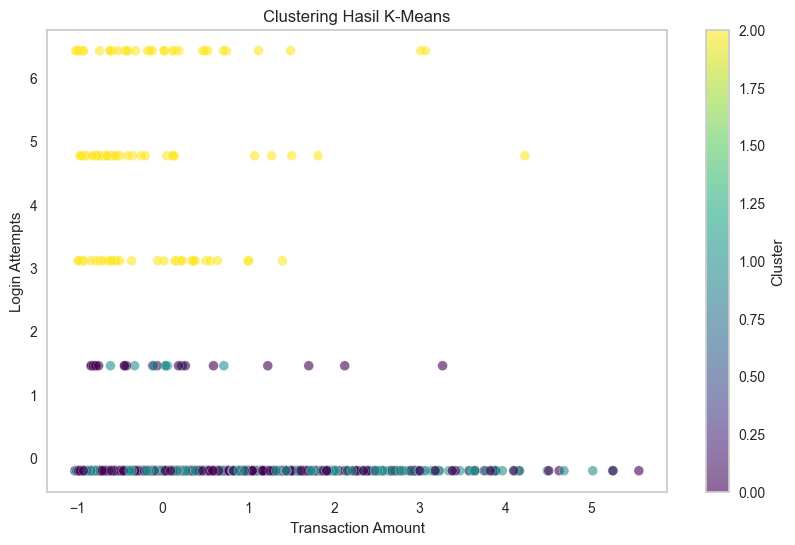

Centroid dari cluster:
[[-0.05508133  0.61026126  0.49661175  0.76450512 -0.18526938]
 [ 0.09203431 -0.9383408  -0.77310578  0.79096639 -0.19284714]
 [-0.07286854 -0.00770844  0.08905777  0.74736842  4.78958014]]


In [490]:
# 1. Membaca Dataset  
df = pd.read_csv('processed_data.csv')  

# 2. Memilih Fitur  
features = df[['TransactionAmount', 'CustomerAge', 'AccountBalance', 'TransactionType', 'LoginAttempts']]  

# 5. Menjalankan K-Means Clustering  
kmeans = KMeans(n_clusters=3, random_state=42)  
kmeans.fit(features)  

# Mendapatkan label dari cluster  
labels = kmeans.labels_  

# Menambahkan label cluster ke DataFrame  
df['Cluster'] = labels  

# 6. Visualisasi Hasil Clustering  
plt.figure(figsize=(10, 6))  
plt.scatter(df['TransactionAmount'], df['LoginAttempts'], c=df['Cluster'], cmap='viridis', s=50, alpha=0.6, edgecolors='w')  
plt.title('Clustering Hasil K-Means')  
plt.xlabel('Transaction Amount')  
plt.ylabel('Login Attempts')  
plt.colorbar(label='Cluster')  
plt.grid()  
plt.show()  

# Menampilkan hasil  
print("Centroid dari cluster:")  
print(kmeans.cluster_centers_)  

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

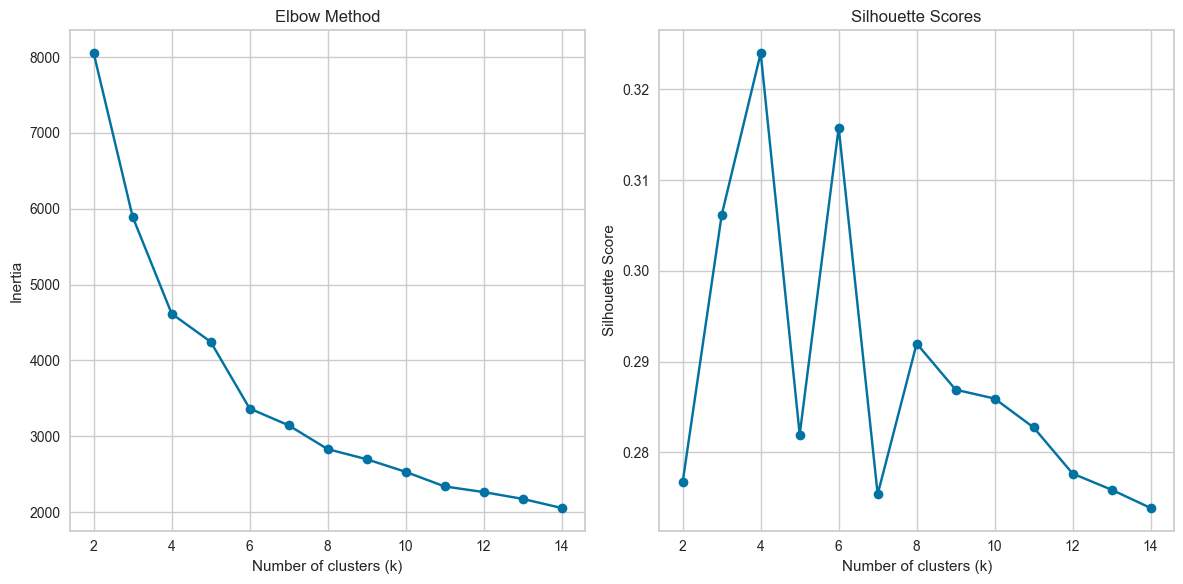

Jumlah cluster optimal berdasarkan Silhouette Score: 4
Silhouette Score terbaik: 0.32401123629425793


In [ ]:
# 1. Membaca Dataset  
df = pd.read_csv('processed_data.csv')  

# 2. Memilih Fitur  
features = df[['TransactionAmount', 'CustomerAge', 'AccountBalance', 'TransactionType', 'LoginAttempts']]  

# 3. Menjalankan Elbow Method  
inertia = []  
silhouette_scores = []  
k_values = range(2, 15)  

for k in k_values:  
    kmeans = KMeans(n_clusters=k, random_state=42)  
    kmeans.fit(features)  
    inertia.append(kmeans.inertia_)  
    silhouette_scores.append(silhouette_score(features, kmeans.labels_))  

# 4. Plot Elbow Method  
plt.figure(figsize=(12, 6))  

# Plot Inertia  
plt.subplot(1, 2, 1)  
plt.plot(k_values, inertia, marker='o')  
plt.title('Elbow Method')  
plt.xlabel('Number of clusters (k)')  
plt.ylabel('Inertia')  

# Plot Silhouette Scores  
plt.subplot(1, 2, 2)  
plt.plot(k_values, silhouette_scores, marker='o')  
plt.title('Silhouette Scores')  
plt.xlabel('Number of clusters (k)')  
plt.ylabel('Silhouette Score')  

plt.tight_layout()  
plt.show()  

# Menampilkan Silhouette Score terbaik dan nilai k  
best_silhouette_score = max(silhouette_scores)  
best_k = k_values[silhouette_scores.index(best_silhouette_score)]  
print(f"Jumlah cluster optimal berdasarkan Silhouette Score: {best_k}")  
print(f"Silhouette Score terbaik: {best_silhouette_score}")

In [492]:
# Menjalankan K-Means Clustering dengan k=4  
k = 4  
kmeans = KMeans(n_clusters=k, random_state=42)  
kmeans.fit(features)  

# Mendapatkan label dari cluster  
labels = kmeans.labels_  

# Menambahkan label cluster ke DataFrame  
df['Cluster'] = labels  

# Menghitung Silhouette Score  
silhouette_avg = silhouette_score(features, labels)  
print(f'Silhouette Score untuk k={k}: {silhouette_avg}')  

Silhouette Score untuk k=4: 0.32401123629425793


Hasil Clustering kurang bagus, karena hanya mendapatkan 0.32 yang dimana kita memerlukan silhouette score yang lebih tinggi (0.7). Oleh karena itu, saya akan mengulangi lagi proses clustering dengan menggunakan metode-metode lainnya.

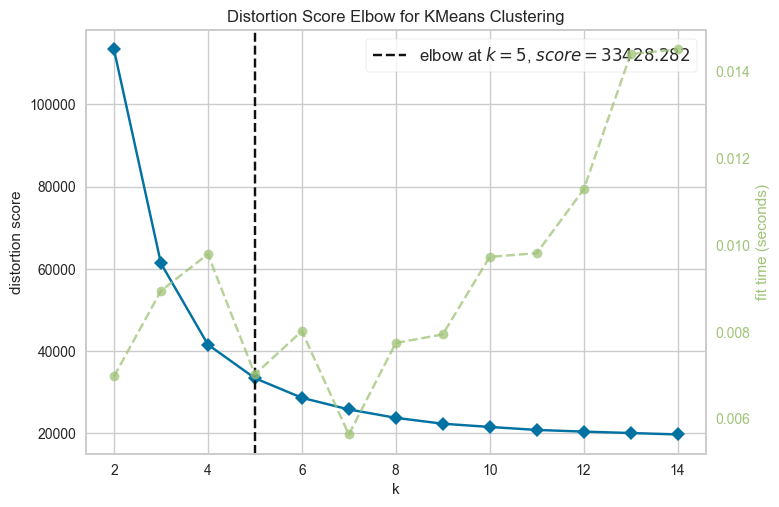

Silhouette Score setelah PCA untuk 3 cluster: 0.55


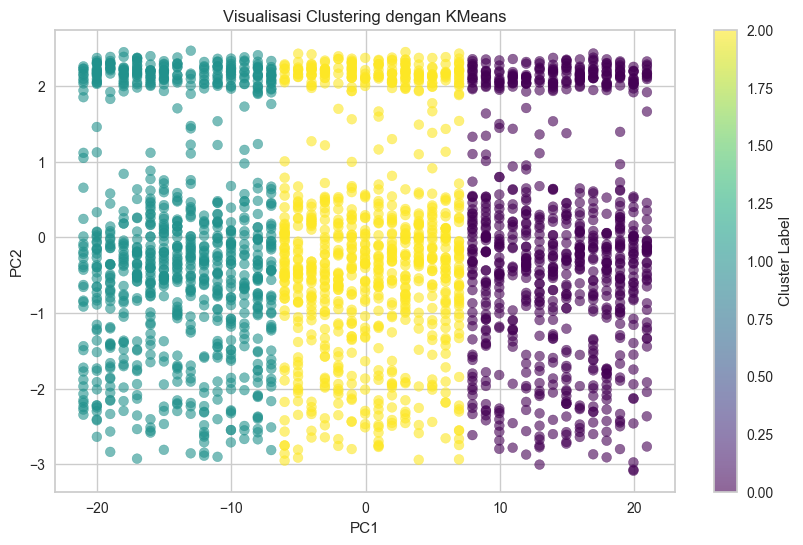


Analisis Karakteristik Setiap Cluster:

Cluster 1:
TransactionAmount       0.016232
CustomerAge            -0.042770
AccountBalance          0.006304
TransactionDuration    -0.016292
LoginAttempts          -0.046184
TransactionType         0.759305
Location               35.437965
Channel                 0.997519
CustomerOccupation      1.502481
dtype: float64

Cluster 2:
TransactionAmount     -0.019037
CustomerAge            0.012739
AccountBalance         0.015884
TransactionDuration    0.008091
LoginAttempts         -0.007254
TransactionType        0.791908
Location               7.149133
Channel                0.988439
CustomerOccupation     1.519075
dtype: float64

Cluster 3:
TransactionAmount       0.004024
CustomerAge             0.027887
AccountBalance         -0.022379
TransactionDuration     0.007292
LoginAttempts           0.051723
TransactionType         0.769322
Location               21.506540
Channel                 0.988109
CustomerOccupation      1.508918
dtype: float

In [ ]:


# Load dataset  
data = pd.read_csv('processed_data.csv')  

# Pilih fitur untuk clustering  
features = [  
    'TransactionAmount',   
    'CustomerAge',   
    'AccountBalance',   
    'TransactionDuration',   
    'LoginAttempts',   
    'TransactionType',   
    'Location',   
    'Channel',   
    'CustomerOccupation'  
]  

# Ambil dan normalisasi fitur  
X_scaled = data[features].copy()  

# Uji Elbow Method untuk KMeans  
kmeans = KMeans(random_state=0)  
visualizer = KElbowVisualizer(kmeans, k=(2, 15))  
visualizer.fit(X_scaled)  
visualizer.show()  
optimal_k = 3 

# Terapkan PCA  
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)  

# Melatih KMeans dengan menyesuaikan max_iter  
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10, init='k-means++', max_iter=100)  
labels = kmeans.fit_predict(X_pca)  

# Hitung Silhouette Score  
silhouette_avg = silhouette_score(X_pca, labels)  
print(f'Silhouette Score setelah PCA untuk {optimal_k} cluster: {silhouette_avg:.2f}')  

# Visualisasi cluster dengan scatter plot  
plt.figure(figsize=(10, 6))  
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)  
plt.title('Visualisasi Clustering dengan KMeans')  
plt.xlabel('PC1')  
plt.ylabel('PC2')  
plt.colorbar(label='Cluster Label')  
plt.show()  

# Analisis karakteristik setiap cluster  
def analyze_clusters(X, labels, k):  
    print("\nAnalisis Karakteristik Setiap Cluster:")  
    for cluster_id in range(k):  
        cluster_data = X[labels == cluster_id]  
        mean_values = cluster_data.mean()  
        print(f"\nCluster {cluster_id + 1}:")  
        print(mean_values)  

analyze_clusters(X_scaled, labels, optimal_k)  

# Simpan hasilnya  
data['Cluster'] = labels  
data.to_csv('clustered_data.csv', index=False)  

Dapat dilihat bahwa kini, silhouette score untuk 3 cluster sudah jauh lebih baik dan score mendekati 0.7. (Dari 0.32 -> 0.55).

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
# Load dataset hasil clustering  
data = pd.read_csv('clustered_data.csv')  

# Pilih fitur untuk clustering  
features = [  
    'TransactionAmount',   
    'CustomerAge',   
    'AccountBalance',   
    'TransactionDuration',   
    'LoginAttempts',   
    'TransactionType',   
    'Location',   
    'Channel',   
    'CustomerOccupation'  
]  

# Ambil dan normalisasi fitur  
X_scaled = data[features].copy()  

# Gunakan cluster sebagai target  
target = data['Cluster']  # Ambil label cluster dari dataset  

# Seleksi fitur menggunakan Random Forest  
rf = RandomForestClassifier(random_state=0)  
rf.fit(X_scaled, target) 

# Seleksi fitur berdasarkan fitur penting dengan threshold yang lebih rendah  
model = SelectFromModel(rf, prefit=True, threshold=0.005)  
X_important = model.transform(X_scaled)  
selected_features = X_scaled.columns[model.get_support()]  

print("Fitur penting yang terpilih:")  
print(selected_features)  

# Terapkan PCA pada fitur yang terpilih  
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_important)  

# Melatih KMeans dengan jumlah cluster optimal  
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10, init='k-means++', max_iter=100)  
labels = kmeans.fit_predict(X_pca)  

# Hitung Silhouette Score  
silhouette_avg = silhouette_score(X_pca, labels)  
print(f'Silhouette Score setelah Seleksi Fitur dan PCA untuk {optimal_k} cluster: {silhouette_avg:.2f}') 

d:\UB\Dicoding\GitHub\Dicoding_Akmal\.venv\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Fitur penting yang terpilih:
Index(['TransactionAmount', 'CustomerAge', 'AccountBalance',
       'TransactionDuration', 'Location'],
      dtype='object')
Silhouette Score setelah Seleksi Fitur dan PCA untuk 3 cluster: 0.56


Membandingkan hasil clustering tanpa feature selection dengan hasil clustering dengan feature selection

In [ ]:
# Load kedua dataset  
file_path_1 = 'clustered_data.csv'                    
file_path_2 = 'clustered_data_with_selected_features.csv' 

data_without_fs = pd.read_csv(file_path_1)  
data_with_fs = pd.read_csv(file_path_2)  

# Menampilkan informasi dasar kedua dataset  
print("Informasi Dataset Tanpa Fitur Seleksi:")  
print(data_without_fs.info())  
print("\nInformasi Dataset Dengan Fitur Seleksi:")  
print(data_with_fs.info())  

# Menghitung jumlah data untuk setiap cluster pada dataset tanpa fitur seleksi  
cluster_counts_without_fs = data_without_fs['Cluster'].value_counts().sort_index()  
print("\nJumlah Data untuk Setiap Cluster (Tanpa Fitur Seleksi):")  
print(cluster_counts_without_fs)  

# Menghitung jumlah data untuk setiap cluster pada dataset dengan fitur seleksi  
cluster_counts_with_fs = data_with_fs['Cluster'].value_counts().sort_index()  
print("\nJumlah Data untuk Setiap Cluster (Dengan Fitur Seleksi):")  
print(cluster_counts_with_fs)  

# Menghitung total data untuk kedua dataset  
total_data_without_fs = data_without_fs.shape[0]  
total_data_with_fs = data_with_fs.shape[0]  
print(f"\nTotal data (Tanpa Fitur Seleksi): {total_data_without_fs}")  
print(f"Total data (Dengan Fitur Seleksi): {total_data_with_fs}")  

# Menampilkan rata-rata dan median dari TransactionAmount untuk setiap cluster  
def cluster_summary(data, cluster_column='Cluster', value_column='TransactionAmount'):  
    return data.groupby(cluster_column)[value_column].agg(['mean', 'median', 'count']).reset_index()  

summary_without_fs = cluster_summary(data_without_fs)  
summary_with_fs = cluster_summary(data_with_fs)  

print("\nRata-rata dan Median TransactionAmount per Cluster (Tanpa Fitur Seleksi):")  
print(summary_without_fs)  

print("\nRata-rata dan Median TransactionAmount per Cluster (Dengan Fitur Seleksi):")  
print(summary_with_fs)  

Informasi Dataset Tanpa Fitur Seleksi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   int64  
 5   Location                 2512 non-null   int64  
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   int64  
 10  CustomerAge              2512 non-null   float64
 11  CustomerOccupation       2512 non-null   int64  
 12  TransactionDuration      2512 non-null   float64
 13  LoginAttempts            2512 non-null 

Tanpa Fitur Seleksi  
| Cluster |    Mean    |   Median   | Count |  
|---------|------------|------------|-------|  
|    0    |  0.016232  | -0.323287  |  806  |  
|    1    | -0.019037  | -0.285876  |  865  |  
|    2    |  0.004024  | -0.296325  |  841  |  

- **Silhouette Score untuk 3 Cluster**: **0.55**  

Dengan Fitur Seleksi  
| Cluster |    Mean    |   Median   | Count |  
|---------|------------|------------|-------|  
|    0    |  0.016232  | -0.323287  |  806  |  
|    1    | -0.019037  | -0.285876  |  865  |  
|    2    |  0.004024  | -0.296325  |  841  |  

- **Silhouette Score untuk 3 Cluster**: **0.56**  
 
Dapat dilihat bahwa setelah dilakukan seleksi fitur, nilai **Silhouette Score** meningkat dari **0.55** menjadi **0.56**. Hal ini menunjukkan bahwa seleksi fitur membantu dalam peningkatan performa model.   

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

d:\UB\Dicoding\GitHub\Dicoding_Akmal\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
d:\UB\Dicoding\GitHub\Dicoding_Akmal\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


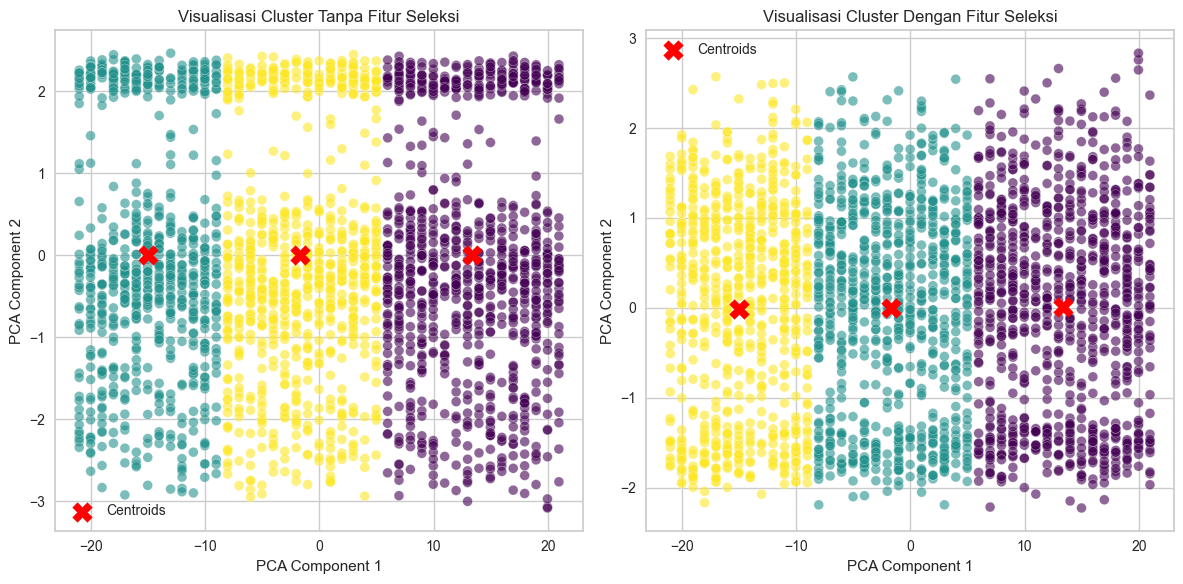

Nilai Centroids Tanpa Fitur Seleksi:
Centroid 1: [ 2.08726091e-02 -2.85985015e-02  6.46409323e-03 -1.97960226e-02
 -2.87212613e-02  7.61802575e-01  3.43701717e+01  1.00321888e+00
  1.51072961e+00]
Centroid 2: [-1.33755808e-03  2.58236685e-02  1.00337925e-02 -2.68091845e-03
 -2.16371299e-02  7.93197279e-01  6.03265306e+00  1.00272109e+00
  1.52244898e+00]
Centroid 3: [-2.18581852e-02  9.08095512e-03 -1.58572454e-02  2.41661162e-02
  5.04988237e-02  7.70414201e-01  1.93692308e+01  9.68047337e-01
  1.49940828e+00]

Nilai Centroids Dengan Fitur Seleksi:
Centroid 1: [ 2.08726091e-02 -2.85985015e-02  6.46409323e-03 -1.97960226e-02
  3.43701717e+01]
Centroid 2: [-2.18581852e-02  9.08095512e-03 -1.58572454e-02  2.41661162e-02
  1.93692308e+01]
Centroid 3: [-1.33755808e-03  2.58236685e-02  1.00337925e-02 -2.68091845e-03
  6.03265306e+00]


In [ ]:

# Load dataset  
data_without_fs = pd.read_csv('clustered_data.csv') 
data_with_fs = pd.read_csv('clustered_data_with_selected_features.csv')  

# Memilih fitur untuk clustering  
features_without_fs = [  
    'TransactionAmount',   
    'CustomerAge',   
    'AccountBalance',   
    'TransactionDuration',   
    'LoginAttempts',   
    'TransactionType',   
    'Location',   
    'Channel',   
    'CustomerOccupation'  
]  

# Clustering Tanpa Fitur Seleksi  
X_without_fs = data_without_fs[features_without_fs]  
kmeans_without_fs = KMeans(n_clusters=3, random_state=0)  
labels_without_fs = kmeans_without_fs.fit_predict(X_without_fs)  

# Menerapkan PCA pada dataset tanpa fitur seleksi  
pca_without_fs = PCA(n_components=2)  
X_pca_without_fs = pca_without_fs.fit_transform(X_without_fs)  

# Visualisasi hasil clustering tanpa fitur seleksi  
plt.figure(figsize=(12, 6))  

# Plot untuk dataset tanpa fitur seleksi  
plt.subplot(1, 2, 1)  
plt.scatter(X_pca_without_fs[:, 0], X_pca_without_fs[:, 1], c=labels_without_fs, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')  
centroids_without_fs = kmeans_without_fs.cluster_centers_  
centroids_pca_without_fs = pca_without_fs.transform(centroids_without_fs)  # Transform centroids with the correct PCA  
plt.scatter(centroids_pca_without_fs[:, 0], centroids_pca_without_fs[:, 1], c='red', s=200, marker='X', label='Centroids')  
plt.title('Visualisasi Cluster Tanpa Fitur Seleksi')  
plt.xlabel('PCA Component 1')  
plt.ylabel('PCA Component 2')  
plt.legend()  

# Clustering Dengan Fitur Seleksi  
important_features = [  
    'TransactionAmount',   
    'CustomerAge',   
    'AccountBalance',   
    'TransactionDuration',   
    'Location'  
]  

X_with_fs = data_with_fs[important_features]  
kmeans_with_fs = KMeans(n_clusters=3, random_state=0)  
labels_with_fs = kmeans_with_fs.fit_predict(X_with_fs)  

# Menerapkan PCA pada dataset dengan fitur seleksi  
pca_with_fs = PCA(n_components=2)  
X_pca_with_fs = pca_with_fs.fit_transform(X_with_fs)  

# Visualisasi hasil clustering dengan fitur seleksi  
plt.subplot(1, 2, 2)  
plt.scatter(X_pca_with_fs[:, 0], X_pca_with_fs[:, 1], c=labels_with_fs, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')  
centroids_with_fs = kmeans_with_fs.cluster_centers_  
centroids_pca_with_fs = pca_with_fs.transform(centroids_with_fs) 
plt.scatter(centroids_pca_with_fs[:, 0], centroids_pca_with_fs[:, 1], c='red', s=200, marker='X', label='Centroids')  
plt.title('Visualisasi Cluster Dengan Fitur Seleksi')  
plt.xlabel('PCA Component 1')  
plt.ylabel('PCA Component 2')  
plt.legend()  

plt.tight_layout()  
plt.show()  

# Menampilkan nilai centroid  
print("Nilai Centroids Tanpa Fitur Seleksi:")  
for i, centroid in enumerate(centroids_without_fs):  
    print(f"Centroid {i+1}: {centroid}")  

print("\nNilai Centroids Dengan Fitur Seleksi:")  
for i, centroid in enumerate(centroids_with_fs):  
    print(f"Centroid {i+1}: {centroid}")  

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
# Load dataset yang telah dinormalisasi  
df_normalized = pd.read_csv('clustered_data_with_selected_features.csv')  

# Load dataset asli dari bank_transactions_data_2.csv untuk mengganti kategori  
df_bank = pd.read_csv('bank_transactions_data_2.csv')  

# Mendefinisikan fitur numerik dan kategorikal  
numeric_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']  
categorical_columns = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']  

# Inisialisasi objek standarizer  
standarizer = StandardScaler()  

# Fitting standarizer menggunakan data asli untuk mengembalikan nilai asal  
df_original = pd.read_csv('bank_transactions_data_2.csv')   
standardized_values = standarizer.fit_transform(df_original[numeric_features])  

df_normalized[numeric_features] = standarizer.inverse_transform(standardized_values)  

# Tampilkan hasil inverse untuk konfirmasi  
print("Data numerik setelah inverse transform:")  
print(df_normalized[numeric_features].head())  

# Masukkan Data yang Sudah Di-Update ke dalam Dataset Asli  
for column in categorical_columns:  
    if column in df_bank.columns:  
        df_normalized[column] = df_bank[column]  

# Simpan DataFrame yang telah diperbarui  
df_normalized.to_csv('inverse_transformed_data.csv', index=False)  

Data numerik setelah inverse transform:
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0              14.09         70.0                 81.0            1.0   
1             376.24         68.0                141.0            1.0   
2             126.29         19.0                 56.0            1.0   
3             184.50         26.0                 25.0            1.0   
4              13.45         26.0                198.0            1.0   

   AccountBalance  
0         5112.21  
1        13758.91  
2         1122.35  
3         8569.06  
4         7429.40  


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?


Deskriptif analisis berdasarkan Cluster:
        TransactionAmount                                               \
                    count        mean         std   min    25%     50%   
Cluster                                                                  
0                   806.0  302.331650  303.523365  1.41  85.11  203.23   
1                   865.0  292.037179  284.156954  0.32  77.57  214.15   
2                   841.0  298.768252  288.773085  0.26  80.96  211.10   

                         CustomerAge             ... LoginAttempts       \
            75%      max       count       mean  ...           75%  max   
Cluster                                          ...                      
0        419.66  1919.11       806.0  43.913151  ...           1.0  5.0   
1        392.05  1831.02       865.0  44.900578  ...           1.0  5.0   
2        420.76  1762.28       841.0  45.170036  ...           1.0  5.0   

        AccountBalance                                        

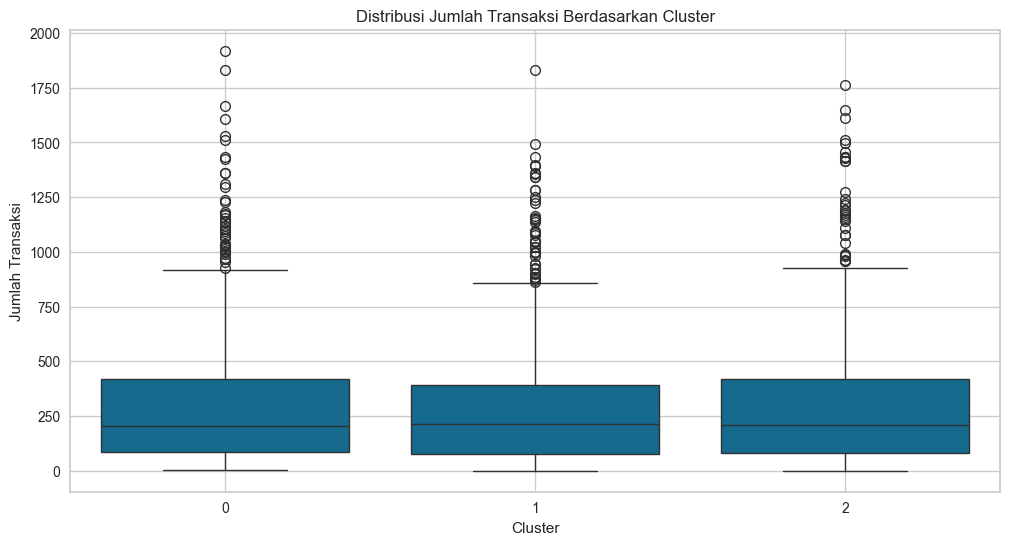

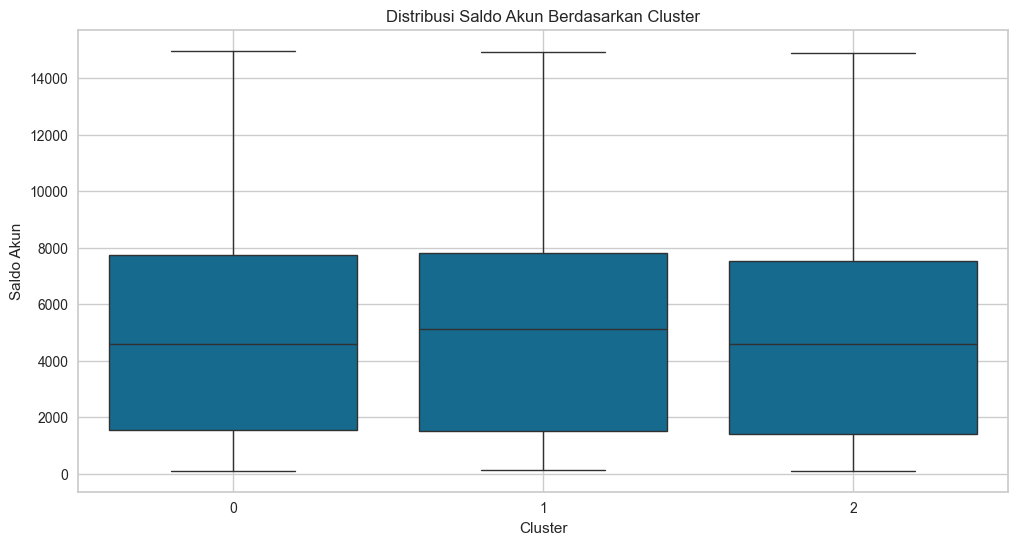

In [499]:
# Membaca dataset  
file_path = 'inverse_transformed_data.csv'  
data = pd.read_csv(file_path)  

# Analisis Deskriptif untuk setiap cluster  
cluster_descriptive = data.groupby('Cluster').describe()  
print("\nDeskriptif analisis berdasarkan Cluster:")  
print(cluster_descriptive)  

# Visualisasi distribusi jumlah transaksi berdasarkan cluster  
plt.figure(figsize=(12, 6))  
sns.boxplot(x='Cluster', y='TransactionAmount', data=data)  
plt.title('Distribusi Jumlah Transaksi Berdasarkan Cluster')  
plt.xlabel('Cluster')  
plt.ylabel('Jumlah Transaksi')  
plt.grid(True)  
plt.show()  

# Visualisasi distribusi saldo akun berdasarkan cluster  
plt.figure(figsize=(12, 6))  
sns.boxplot(x='Cluster', y='AccountBalance', data=data)  
plt.title('Distribusi Saldo Akun Berdasarkan Cluster')  
plt.xlabel('Cluster')  
plt.ylabel('Saldo Akun')  
plt.grid(True)  
plt.show()  

| Fitur                       | Cluster 1                                   | Cluster 2                                   | Cluster 3                                   |  
|-----------------------------|---------------------------------------------|---------------------------------------------|---------------------------------------------|  
| **Jumlah Transaksi**        | 865                                         | 841                                         | 806                                         |  
| **Rata-rata Jumlah Transaksi** | 292.04                                   | 298.77                                     | 302.33                                     |  
| **Rata-rata Usia Pelanggan**  | 44.90 tahun                              | 45.17 tahun                                | 43.91 tahun                                |  
| **Rata-rata Saldo Akun**     | 5,176.25                                  | 5,027.02                                   | 5,138.89                                   |  
| **Rata-rata Upaya Login**     | 1.0                                       | 1.0                                         | 1.0                                         |  
| **Range Saldo Akun**        | 117.98 hingga 14,942.78                   | 101.25 hingga 14,881.77                    | 102.20 hingga 14,977.99                    |  
| **CustomerOccupation (Doctor)** | 224                                    | 199                                         | 208                                         |  
| **CustomerOccupation (Engineer)** | 200                                   | 225                                         | 200                                         |  
| **CustomerOccupation (Retired)** | 209                                    | 207                                         | 183                                         |  
| **CustomerOccupation (Student)** | 232                                   | 210                                         | 215                                         |  
| **TransactionType (Credit)**  | 180                                       | 194                                         | 194                                         |  
| **TransactionType (Debit)**   | 685                                       | 647                                         | 612                                         |  
| **Location Diversity**      | Variatif                                   | Terbatas                                    | Variatif                                   |  
| **Channel (ATM Usage)**     | Mirip di semua cluster                     | Mirip di semua cluster                      | Mirip di semua cluster                     |  

### Interpretasi Hasil Clustering  

| Cluster  | Rincian                                                                                                          | Analisis                                                                                                                                                  |  
|----------|------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------|  
| **1**    | - Pelanggan di cluster ini memiliki rating transaksi tinggi tetapi saldo relatif tinggi.                         | - Cluster ini bisa jadi kelompok pelanggan yang stabil, yang cenderung melakukan transaksi rutin, sehingga memiliki potensi rendah untuk penipuan.      |  
|          | - Keragaman pekerjaan dan kelompok usia menunjukkan suatu keterkaitan yang positif terhadap tingkat kredit dan debit. |                                                                                                                                                          |  
| **2**    | - Cluster ini menunjukkan sedikit lebih rendah dalam jumlah kredit dibandingkan dengan Cluster 1 dan 3.        | - Jika ada peningkatan upaya login yang tidak biasa di cluster ini, bisa menjadi sinyal peringatan bagi kegiatan penipuan.                               |  
|          | - Saldo akun rata-rata menunjukkan kecenderungan pelanggan yang mirip dengan Cluster 1.                         |                                                                                                                                                          |  
| **3**    | - Memiliki rata-rata saldo tertinggi dan rata-rata jumlah transaksi sesuai dengan cluster lainnya.              | - Ini bisa jadi cluster berisiko rendah karena memiliki angka debit yang lebih baik dan saldo yang stabil.                                              |  
|          | - Ketidakberagaman dalam lokasi menunjukkan basis pelanggan yang lebih homogen.                                 |                                                                                                                                                          |  


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [500]:
df_normalized.to_csv('dataset_clustering.csv', index=False)  